In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [57]:
data = pd.read_csv('irrigation.csv')
data.head(100)

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0   2019-02-23 00:00:00            67.92                 0.0            55.72   
1   2019-02-23 00:05:00            67.89                 0.0            55.74   
2   2019-02-23 00:10:00            67.86                 0.0            55.77   
3   2019-02-23 00:15:00            67.84                 0.0            55.79   
4   2019-02-23 00:20:00            67.81                 0.0            55.82   
..                  ...              ...                 ...              ...   
95  2019-02-23 07:55:00            65.31                 0.0            55.46   
96  2019-02-23 08:00:00            65.28                 0.0            55.38   
97  2019-02-23 08:05:00            65.25                 0.0            55.31   
98  2019-02-23 08:10:00            65.22                 0.0            55.23   
99  2019-02-23 08:15:00            65.19                 0.0            55.15   

    Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                  0.0            -1.56                 1.0            26.57   
1                  0.0            -1.51                 1.0            26.58   
2                  0.0            -1.47                 1.0            26.59   
3                  0.0            -1.42                 1.0            26.61   
4                  0.0            -1.38                 1.0            26.62   
..                 ...              ...                 ...              ...   
95                 0.0            -4.18                 0.0            27.57   
96                 0.0            -4.25                 0.0            27.58   
97                 0.0            -4.32                 0.0            27.59   
98                 0.0            -4.38                 0.0            27.60   
99                 0.0            -4.45                 0.0            27.61   

    Irrigation field 4  Air temperature (C)  Air humidity (%)  Pressure (KPa)  \
0                  1.0                19.52             55.04          101.50   
1                  1.0                19.49             55.17          101.50   
2                  1.0                19.47             55.30          101.51   
3                  1.0                19.54             54.20          101.51   
4                  1.0                19.61             53.09          101.51   
..                 ...                  ...               ...             ...   
95                 1.0                19.60             22.42          101.46   
96                 1.0                19.89             22.11          101.46   
97                 1.0                20.28             22.04          101.46   
98                 1.0                20.68             21.97          101.47   
99                 1.0                21.21             21.44          101.48   

    Wind speed (Km/h)  Wind gust (Km/h)  Wind direction (Deg)  
0                2.13              6.30                225.00  
1                2.01             10.46                123.75  
2                1.90             14.63                 22.50  
3                2.28             16.08                123.75  
4                2.66             17.52                225.00  
..                ...               ...                   ...  
95               3.24             16.63                315.00  
96               3.57             17.27                315.00  
97               3.55             17.80                315.00  
98               3.53             18.32                315.00  
99               3.66             18.76                315.00  

[100 rows x 15 columns]

In [8]:
data.shape

(28049, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             28049 non-null  object 
 1   Soil humidity 1       8917 non-null   float64
 2   Irrigation field 1    10066 non-null  float64
 3   Soil humidity 2       26304 non-null  float64
 4   Irrigation field 2    28029 non-null  float64
 5   Soil humidity 3       16086 non-null  float64
 6   Irrigation field 3    17236 non-null  float64
 7   Soil humidity 4       26306 non-null  float64
 8   Irrigation field 4    28029 non-null  float64
 9   Air temperature (C)   23995 non-null  float64
 10  Air humidity (%)      23995 non-null  float64
 11  Pressure (KPa)        23995 non-null  float64
 12  Wind speed (Km/h)     23995 non-null  float64
 13  Wind gust (Km/h)      23995 non-null  float64
 14  Wind direction (Deg)  23995 non-null  float64
dtypes: float64(14), obj

In [10]:
print(f'The number of rows are {data.shape[0] } and the number of columns are {data.shape[1]}')

The number of rows are 28049 and the number of columns are 15


In [11]:
#Finding all the categorical and continuous values
categorical_col=[]
continuous_val=[]


for i in data.columns:
    
    if data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        continuous_val.append(i)
        
print(categorical_col)
print(continuous_val)


['timestamp']
['Soil humidity 1', 'Irrigation field 1', 'Soil humidity 2', 'Irrigation field 2', 'Soil humidity 3', 'Irrigation field 3', 'Soil humidity 4', 'Irrigation field 4', 'Air temperature (C)', 'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)', 'Wind gust (Km/h)', 'Wind direction (Deg)']


In [12]:
data.nunique()

timestamp               28049
Soil humidity 1          2827
Irrigation field 1          2
Soil humidity 2          6566
Irrigation field 2          2
Soil humidity 3          6082
Irrigation field 3          2
Soil humidity 4          5150
Irrigation field 4          2
Air temperature (C)      2878
Air humidity (%)         8142
Pressure (KPa)            137
Wind speed (Km/h)        2257
Wind gust (Km/h)         4799
Wind direction (Deg)      547
dtype: int64

In [13]:
data.isnull().sum()

timestamp                   0
Soil humidity 1         19132
Irrigation field 1      17983
Soil humidity 2          1745
Irrigation field 2         20
Soil humidity 3         11963
Irrigation field 3      10813
Soil humidity 4          1743
Irrigation field 4         20
Air temperature (C)      4054
Air humidity (%)         4054
Pressure (KPa)           4054
Wind speed (Km/h)        4054
Wind gust (Km/h)         4054
Wind direction (Deg)     4054
dtype: int64

# Visualizing the missing values

In [14]:
# Complete the call to convert the date column
data['timestamp'] =  pd.to_datetime(data['timestamp'])

# Confirm the date column is in datetime format
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             28049 non-null  datetime64[ns]
 1   Soil humidity 1       8917 non-null   float64       
 2   Irrigation field 1    10066 non-null  float64       
 3   Soil humidity 2       26304 non-null  float64       
 4   Irrigation field 2    28029 non-null  float64       
 5   Soil humidity 3       16086 non-null  float64       
 6   Irrigation field 3    17236 non-null  float64       
 7   Soil humidity 4       26306 non-null  float64       
 8   Irrigation field 4    28029 non-null  float64       
 9   Air temperature (C)   23995 non-null  float64       
 10  Air humidity (%)      23995 non-null  float64       
 11  Pressure (KPa)        23995 non-null  float64       
 12  Wind speed (Km/h)     23995 non-null  float64       
 13  Wind gust (Km/h)

In [15]:
data.head(30)

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0  2019-02-23 00:00:00            67.92                 0.0            55.72   
1  2019-02-23 00:05:00            67.89                 0.0            55.74   
2  2019-02-23 00:10:00            67.86                 0.0            55.77   
3  2019-02-23 00:15:00            67.84                 0.0            55.79   
4  2019-02-23 00:20:00            67.81                 0.0            55.82   
5  2019-02-23 00:25:00            67.78                 0.0            55.85   
6  2019-02-23 00:30:00            67.76                 0.0            55.87   
7  2019-02-23 00:35:00            67.73                 0.0            55.90   
8  2019-02-23 00:40:00            67.70                 0.0            55.92   
9  2019-02-23 00:45:00            67.68                 0.0            55.95   
10 2019-02-23 00:50:00            67.65                 0.0            55.97   
11 2019-02-23 00:55:00            67.62                 0.0            56.00   
12 2019-02-23 01:00:00            67.59                 0.0            56.00   
13 2019-02-23 01:05:00            67.57                 0.0            56.00   
14 2019-02-23 01:10:00            67.54                 0.0            56.00   
15 2019-02-23 01:15:00            67.51                 0.0            56.00   
16 2019-02-23 01:20:00            67.49                 0.0            56.00   
17 2019-02-23 01:25:00            67.46                 0.0            56.00   
18 2019-02-23 01:30:00            67.43                 0.0            56.00   
19 2019-02-23 01:35:00            67.41                 0.0            56.00   
20 2019-02-23 01:40:00            67.38                 0.0            56.00   
21 2019-02-23 01:45:00            67.35                 0.0            56.00   
22 2019-02-23 01:50:00            67.32                 0.0            56.00   
23 2019-02-23 01:55:00            67.30                 0.0            56.00   
24 2019-02-23 02:00:00            67.27                 0.0            56.00   
25 2019-02-23 02:05:00            67.24                 0.0            56.00   
26 2019-02-23 02:10:00            67.22                 0.0            56.00   
27 2019-02-23 02:15:00            67.19                 0.0            56.00   
28 2019-02-23 02:20:00            67.16                 0.0            56.00   
29 2019-02-23 02:25:00            67.14                 0.0            56.00   

    Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                  0.0            -1.56                 1.0            26.57   
1                  0.0            -1.51                 1.0            26.58   
2                  0.0            -1.47                 1.0            26.59   
3                  0.0            -1.42                 1.0            26.61   
4                  0.0            -1.38                 1.0            26.62   
5                  0.0            -1.33                 1.0            26.63   
6                  0.0            -1.28                 1.0            26.64   
7                  0.0            -1.24                 1.0            26.65   
8                  0.0            -1.19                 1.0            26.66   
9                  0.0            -1.15                 1.0            26.67   
10                 0.0            -1.10                 1.0            26.68   
11                 0.0            -1.06                 1.0            26.69   
12                 0.0            -1.01                 1.0            26.70   
13                 0.0            -0.96                 1.0            26.71   
14                 0.0            -0.92                 1.0            26.72   
15                 0.0            -0.87                 1.0            26.73   
16                 0.0            -0.83                 1.0            26.74   
17                 0.0            -0.78                 1.0            26.75   
18          

In [16]:
data.head()

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0 2019-02-23 00:00:00            67.92                 0.0            55.72   
1 2019-02-23 00:05:00            67.89                 0.0            55.74   
2 2019-02-23 00:10:00            67.86                 0.0            55.77   
3 2019-02-23 00:15:00            67.84                 0.0            55.79   
4 2019-02-23 00:20:00            67.81                 0.0            55.82   

   Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                 0.0            -1.56                 1.0            26.57   
1                 0.0            -1.51                 1.0            26.58   
2                 0.0            -1.47                 1.0            26.59   
3                 0.0            -1.42                 1.0            26.61   
4                 0.0            -1.38                 1.0            26.62   

   Irrigation field 4  Air temperature (C)  Air humidity (%)  Pressure (KPa)  \
0                 1.0                19.52             55.04          101.50   
1                 1.0                19.49             55.17          101.50   
2                 1.0                19.47             55.30          101.51   
3                 1.0                19.54             54.20          101.51   
4                 1.0                19.61             53.09          101.51   

   Wind speed (Km/h)  Wind gust (Km/h)  Wind direction (Deg)  
0               2.13              6.30                225.00  
1               2.01             10.46                123.75  
2               1.90             14.63                 22.50  
3               2.28             16.08                123.75  
4               2.66             17.52                225.00

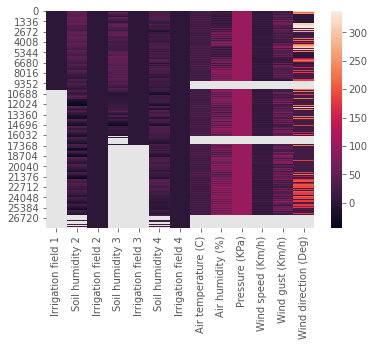

In [17]:
data_new = data.iloc[:,2:15]
sns.heatmap(data_new)
plt.show()

# Dealing with the missing values

In [18]:
#Checking percentage of missing data in every column
(data.isnull().sum()/len(data))*100

timestamp                0.000000
Soil humidity 1         68.209205
Irrigation field 1      64.112803
Soil humidity 2          6.221256
Irrigation field 2       0.071304
Soil humidity 3         42.650362
Irrigation field 3      38.550394
Soil humidity 4          6.214125
Irrigation field 4       0.071304
Air temperature (C)     14.453278
Air humidity (%)        14.453278
Pressure (KPa)          14.453278
Wind speed (Km/h)       14.453278
Wind gust (Km/h)        14.453278
Wind direction (Deg)    14.453278
dtype: float64

In [19]:
#Filling the missing values for continuous variables with mean
data['Soil humidity 1']=data['Soil humidity 1'].fillna(data['Soil humidity 1'].mean())
#data['Irrigation field 1']=data['Irrigation field 1'].fillna(data['Irrigation field 1'].mean())

In [20]:
# Delete the null values is the better souluation 
data=data[data['Irrigation field 1'].notna()]

In [21]:
#check if the nan value fill or not by calculate the perc %
(data.isnull().sum()/len(data))*100

timestamp                0.000000
Soil humidity 1          0.000000
Irrigation field 1       0.000000
Soil humidity 2          0.000000
Irrigation field 2       0.000000
Soil humidity 3          0.000000
Irrigation field 3       0.000000
Soil humidity 4          0.000000
Irrigation field 4       0.000000
Air temperature (C)     11.444467
Air humidity (%)        11.444467
Pressure (KPa)          11.444467
Wind speed (Km/h)       11.444467
Wind gust (Km/h)        11.444467
Wind direction (Deg)    11.444467
dtype: float64

In [22]:
data['Soil humidity 2']=data['Soil humidity 2'].fillna(data['Soil humidity 2'].mean())
data['Irrigation field 2']=data['Irrigation field 2'].fillna(data['Irrigation field 2'].mean()) 

data['Soil humidity 3']=data['Soil humidity 3'].fillna(data['Soil humidity 3'].mean())
data['Irrigation field 3']=data['Irrigation field 3'].fillna(data['Irrigation field 3'].mean()) 

data['Soil humidity 4']=data['Soil humidity 4'].fillna(data['Soil humidity 4'].mean())
data['Irrigation field 4']=data['Irrigation field 4'].fillna(data['Irrigation field 4'].mean()) 

data['Air temperature (C)']=data['Air temperature (C)'].fillna(data['Air temperature (C)'].mean())
data['Air humidity (%)']=data['Air humidity (%)'].fillna(data['Air humidity (%)'].mean())
data['Pressure (KPa)']=data['Pressure (KPa)'].fillna(data['Pressure (KPa)'].mean())
data['Wind speed (Km/h)']=data['Wind speed (Km/h)'].fillna(data['Wind speed (Km/h)'].mean())
data['Wind gust (Km/h)']=data['Wind gust (Km/h)'].fillna(data['Wind gust (Km/h)'].mean())
data['Wind direction (Deg)']=data['Wind direction (Deg)'].fillna(data['Wind direction (Deg)'].mean())




In [23]:
#check if the nan value fill or not by calculate the perc %
(data.isnull().sum()/len(data))*100

timestamp               0.0
Soil humidity 1         0.0
Irrigation field 1      0.0
Soil humidity 2         0.0
Irrigation field 2      0.0
Soil humidity 3         0.0
Irrigation field 3      0.0
Soil humidity 4         0.0
Irrigation field 4      0.0
Air temperature (C)     0.0
Air humidity (%)        0.0
Pressure (KPa)          0.0
Wind speed (Km/h)       0.0
Wind gust (Km/h)        0.0
Wind direction (Deg)    0.0
dtype: float64

In [24]:
# check the data type of the data frame 
print(data.dtypes)
  
# print dataframe. 
data.head(5)

timestamp               datetime64[ns]
Soil humidity 1                float64
Irrigation field 1             float64
Soil humidity 2                float64
Irrigation field 2             float64
Soil humidity 3                float64
Irrigation field 3             float64
Soil humidity 4                float64
Irrigation field 4             float64
Air temperature (C)            float64
Air humidity (%)               float64
Pressure (KPa)                 float64
Wind speed (Km/h)              float64
Wind gust (Km/h)               float64
Wind direction (Deg)           float64
dtype: object


timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0 2019-02-23 00:00:00            67.92                 0.0            55.72   
1 2019-02-23 00:05:00            67.89                 0.0            55.74   
2 2019-02-23 00:10:00            67.86                 0.0            55.77   
3 2019-02-23 00:15:00            67.84                 0.0            55.79   
4 2019-02-23 00:20:00            67.81                 0.0            55.82   

   Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                 0.0            -1.56                 1.0            26.57   
1                 0.0            -1.51                 1.0            26.58   
2                 0.0            -1.47                 1.0            26.59   
3                 0.0            -1.42                 1.0            26.61   
4                 0.0            -1.38                 1.0            26.62   

   Irrigation field 4  Air temperature (C)  Air humidity (%)  Pressure (KPa)  \
0                 1.0                19.52             55.04          101.50   
1                 1.0                19.49             55.17          101.50   
2                 1.0                19.47             55.30          101.51   
3                 1.0                19.54             54.20          101.51   
4                 1.0                19.61             53.09          101.51   

   Wind speed (Km/h)  Wind gust (Km/h)  Wind direction (Deg)  
0               2.13              6.30                225.00  
1               2.01             10.46                123.75  
2               1.90             14.63                 22.50  
3               2.28             16.08                123.75  
4               2.66             17.52                225.00

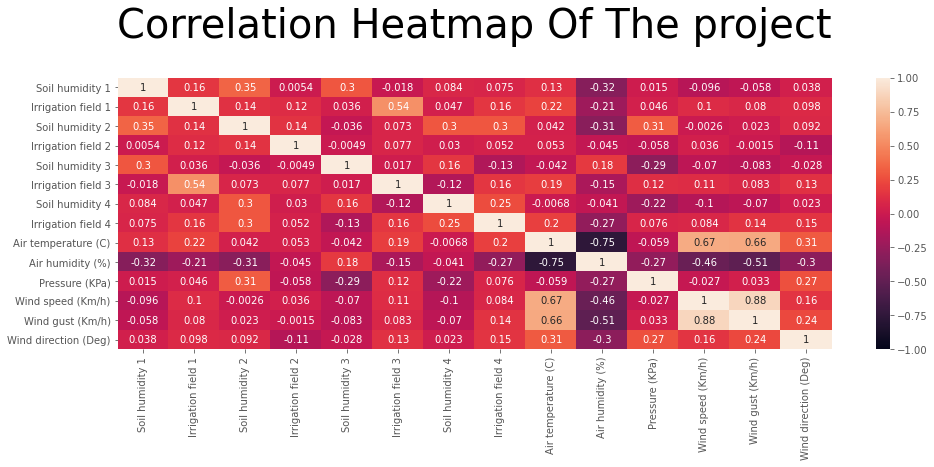

In [25]:
plt.figure(figsize=(16,5))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap Of The project', fontdict={'fontsize':40}, pad=40);



# Plotting and Visualizing Data

<AxesSubplot:xlabel='Irrigation field 1', ylabel='Soil humidity 1'>

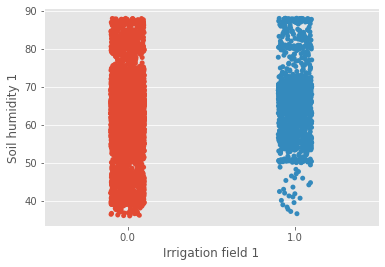

In [26]:
sns.stripplot(x="Irrigation field 1", y="Soil humidity 1", data=data, jitter=True)

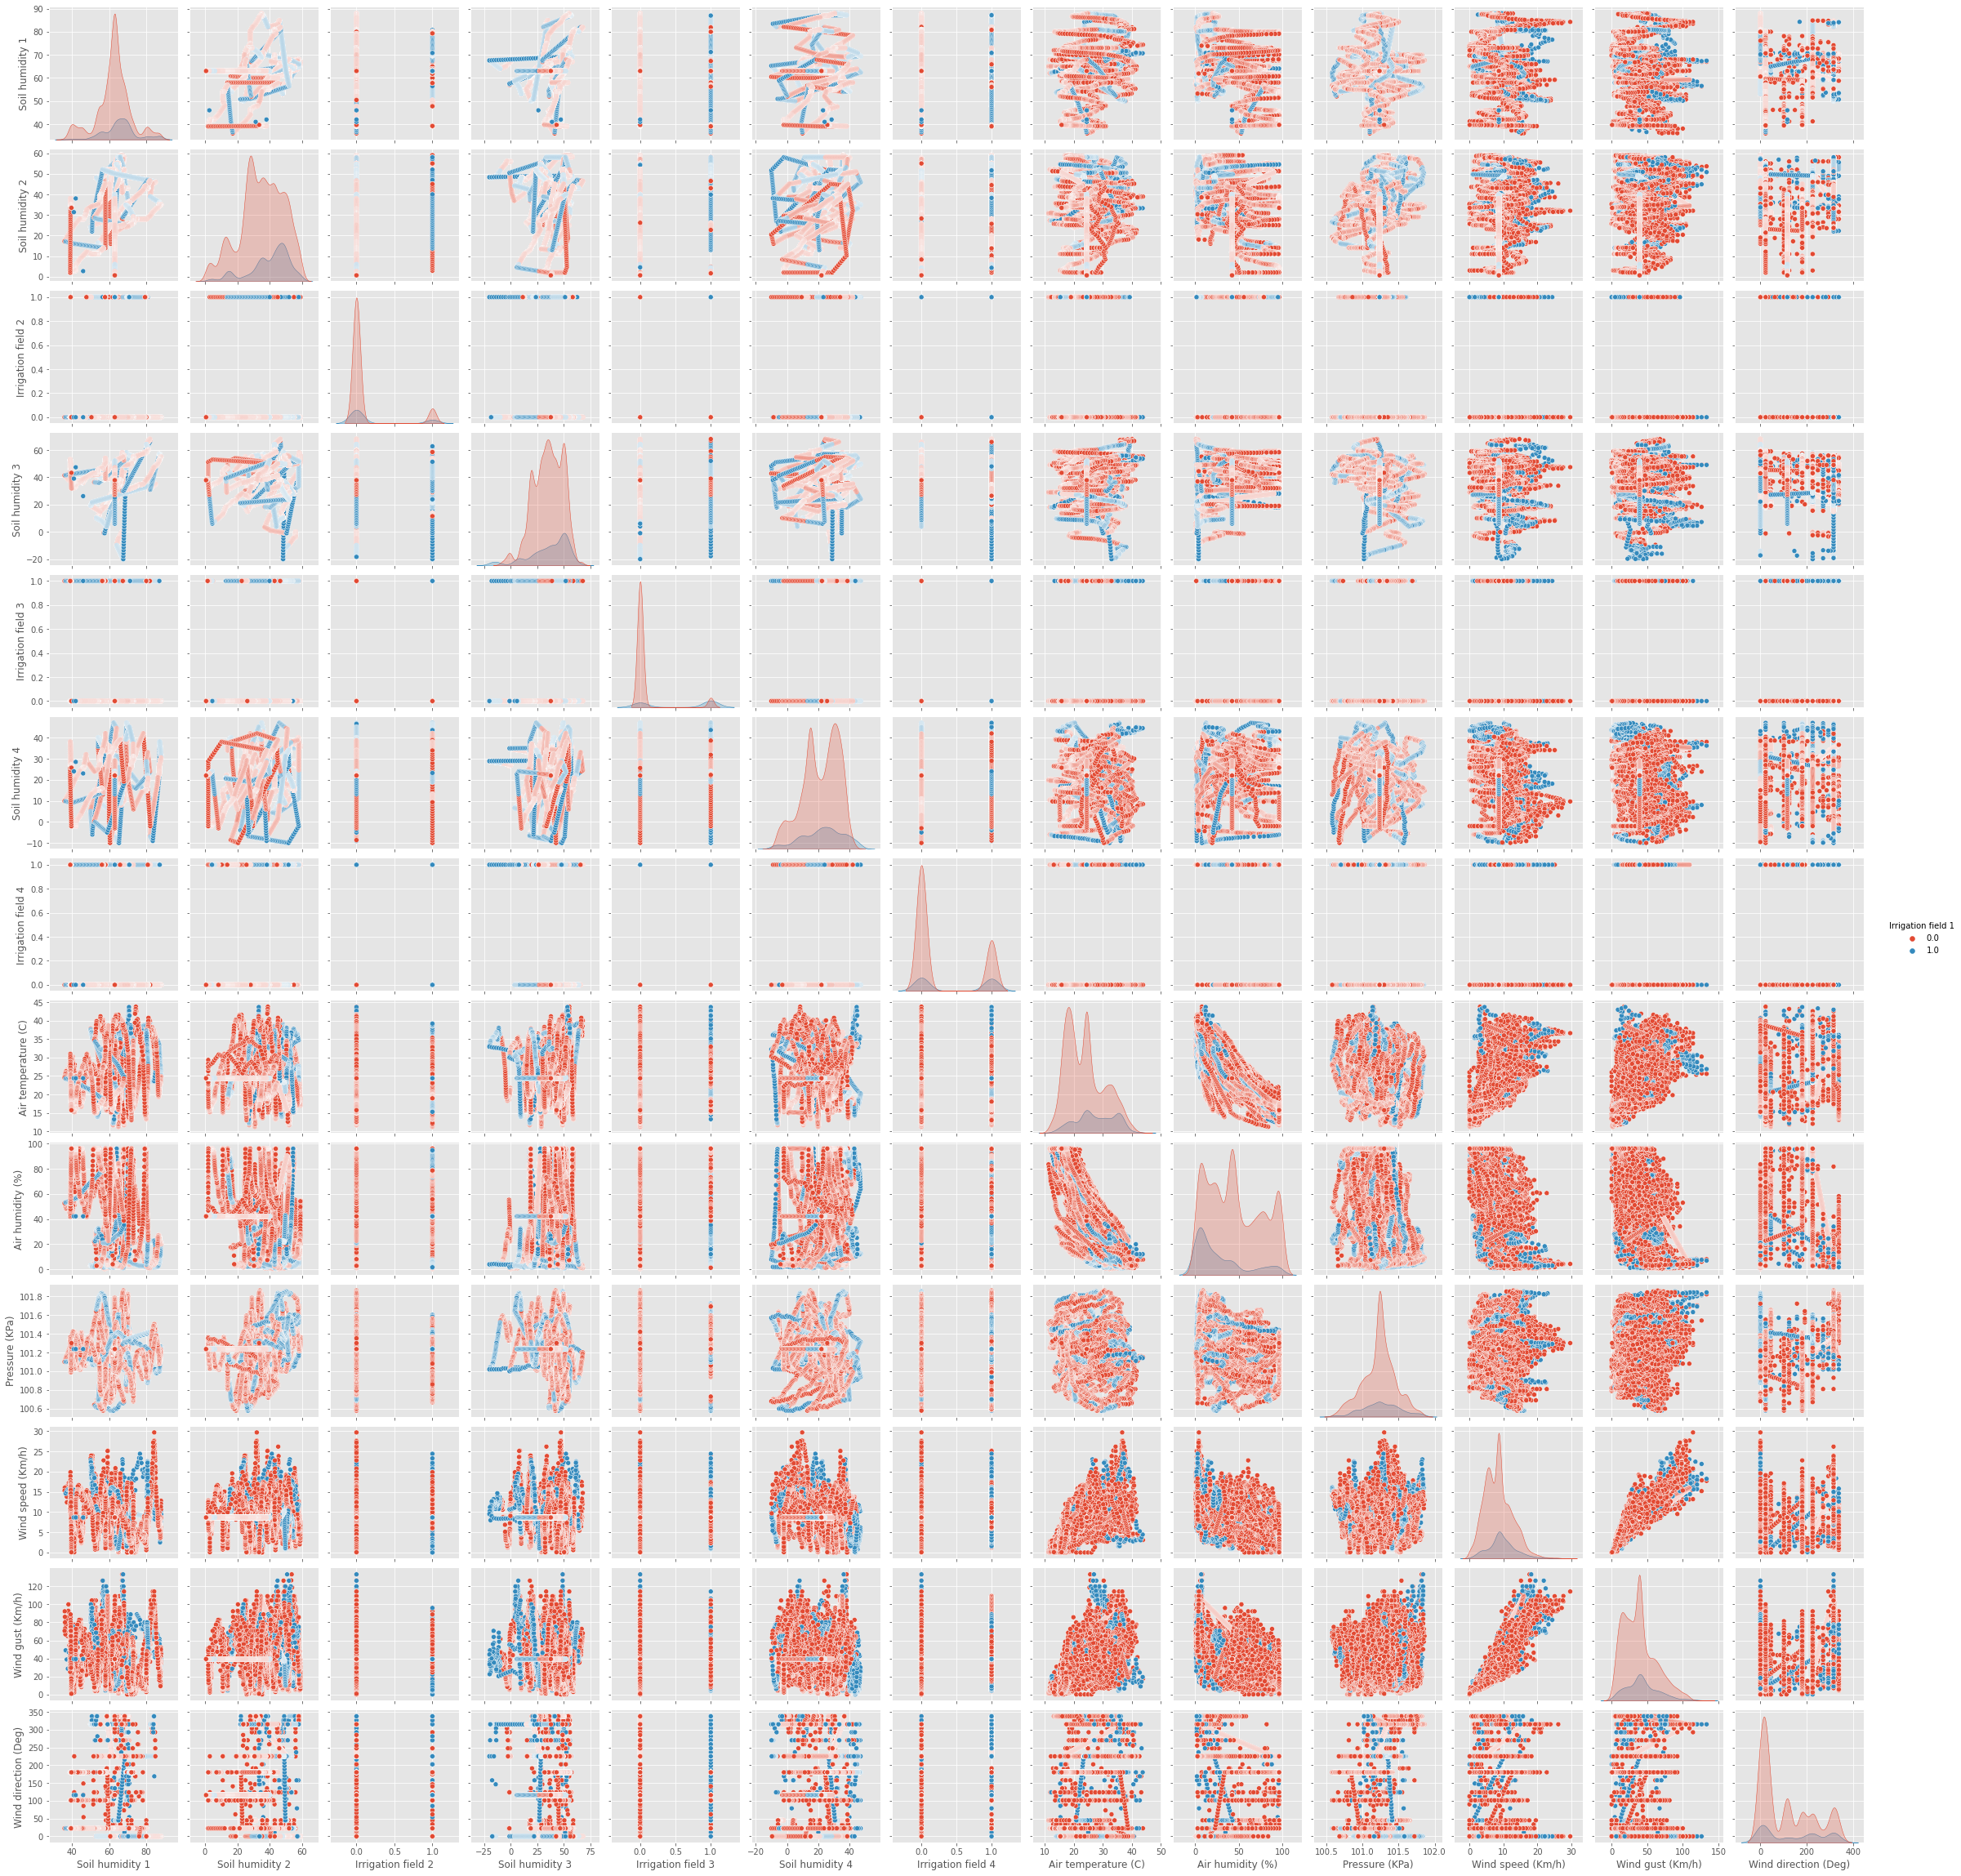

In [36]:
#graph of a pair plot that shows the relations between all of the different features
sns.pairplot(data, hue='Irrigation field 1');

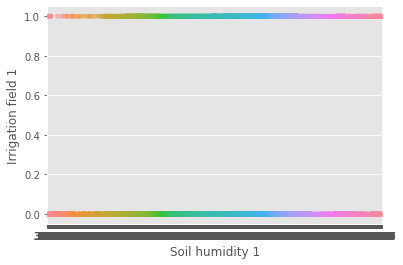

In [39]:
sns.stripplot(x='Soil humidity 1',y='Irrigation field 1', jitter=True,data=data,alpha=0.6);

# The objective of this project is to accurately predict the soil moisture level multiple days in advance. This solution will help farmers prepare their irrigation schedules more efficiently.

In [27]:
col_names=data.columns.values
print(col_names)

['timestamp' 'Soil humidity 1' 'Irrigation field 1' 'Soil humidity 2'
 'Irrigation field 2' 'Soil humidity 3' 'Irrigation field 3'
 'Soil humidity 4' 'Irrigation field 4' 'Air temperature (C)'
 'Air humidity (%)' 'Pressure (KPa)' 'Wind speed (Km/h)'
 'Wind gust (Km/h)' 'Wind direction (Deg)']


In [42]:
#split dataset in features and target variable
feature_cols = ['Soil humidity 1','Irrigation field 3' ]#,'Air temperature (C)','Air humidity (%)']
x = data[feature_cols] # Features
target_col = 'Irrigation field 1'
y = data[target_col] # Target variable

## Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [43]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#convert from float to int
#y_train = y_train.astype('int32')
x_train.shape , y_train.shape , x_train.head() ,y_train.head()



((7549, 2),
 (7549,),
       Soil humidity 1  Irrigation field 3
 155             64.62                 0.0
 8540            44.89                 0.0
 2670            62.19                 0.0
 4906            58.31                 0.0
 5590            85.57                 0.0,
 155     1.0
 8540    0.0
 2670    0.0
 4906    0.0
 5590    0.0
 Name: Irrigation field 1, dtype: float64)

# Model Development and Prediction

In [68]:
# import the sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lr = LogisticRegression()

# fit the model with data # Training it by using our train data:
y_train=np.asarray(y_train)
lr.fit(x_train,y_train)

#Predicted the irrigation of feild 1 
y_pred=lr.predict(x_test)

#Calculate the accuracy of the model :
acc_lr = accuracy_score(y_test, y_pred)

print(acc_lr)

# score1 = get_scorer('roc_auc')(lr, X_test, y_test)
# print (score1)


0.8796185935637664


In [76]:
y_train.value_counts()

0.0    6214
1.0    1335
Name: Irrigation field 1, dtype: int64

In [45]:
print(y_pred)
print(y_train)

[0. 0. 0. ... 0. 0. 1.]
[1. 0. 0. ... 0. 0. 1.]


In [47]:
type(y_train),type(y_pred)

(numpy.ndarray, numpy.ndarray)

# The ROC curve

ROC AUC score =  0.8242375096358965


(-0.05, 1.05)

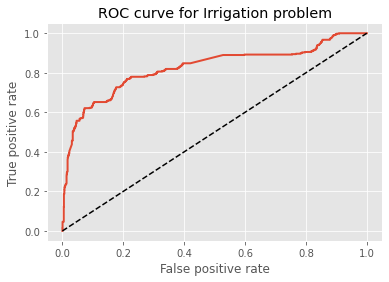

In [93]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)
print("ROC AUC score = ", roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Irrigation problem');
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='black',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [50]:
#KNeighbors Model
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
pred_knn = knn_clf.predict(x_test)
acc_knn = accuracy_score(y_test, pred_knn)

print(acc_knn)

0.8827969805323799


# The ROC curve

ROC AUC score of KNN =  0.8692753165165139


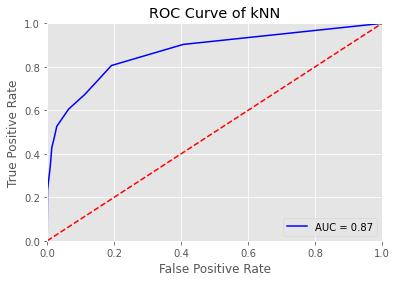

In [95]:
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC AUC score of KNN = ", roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


In [49]:
#RandomForest Model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
pred_rf = rf_clf.predict(x_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8609455701231625


In [51]:
#DecisionTree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred_dt = dt_clf.predict(x_test)
acc_dt = accuracy_score(y_test, pred_dt)


print(acc_dt)

0.8609455701231625


In [59]:
model_performance = pd.DataFrame({
    "Model": ["Random Forest", 
              "Logistic Regression", "K Nearest Neighbors",  
              "Decision Tree"],
    "Accuracy": [acc_rf, 
              acc_lr, acc_knn, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
2  K Nearest Neighbors  0.882797
1  Logistic Regression  0.879619
0        Random Forest  0.861740
3        Decision Tree  0.860946